<blockquote>
    <h1>Exercise 7.12</h1>
    <p>This problem is a continuation of the previous exercise. In a toy example with $p = 100$, show that one can approximate the multiple linear regression coefficient estimates by repeatedly performing simple linear regression in a backfitting procedure. How many backfitting iterations are required in order to obtain a "good" approximation to the multiple regression coefficient estimates? Create a plot to justify your answer.</p>
</blockquote>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
np.random.seed(42)
p = 100
n = 1000
X = np.zeros(shape=(n, p))
gaussian_noise = np.random.normal(size=n, loc=0, scale=2)
beta = np.zeros(shape=(p + 1, ))
beta[0] = -7.5
for i in range(p):
    loc = np.random.normal(loc=0, scale=100)
    scale = abs(np.random.normal(loc=0, scale=10))
    X[:, i] = np.random.normal(size=n, loc=loc, scale=scale)
    
    beta[i + 1] = np.random.normal(loc=0, scale=50)
    
X_intercept = sm.add_constant(X)
Y = X_intercept @ beta + gaussian_noise

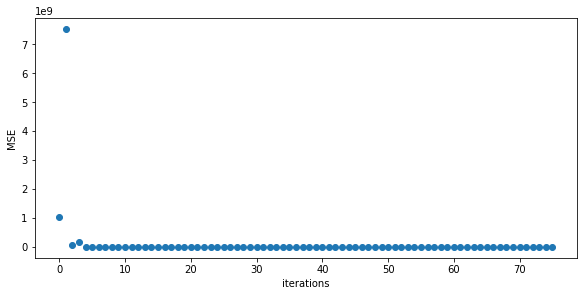

In [3]:
max_iter = 500
beta_hat = np.ones(shape=(max_iter, p + 1))
mse = []
Y_pred = X_intercept @ beta_hat[0]
mse.append(mean_squared_error(Y, Y_pred))
threshold = 1e-6
for i in range(1, max_iter): # i = 0 is the initialization row
    for k in range(1, p + 1):
        a = Y - np.delete(X_intercept, [0, k], axis=1) @ np.delete(beta_hat[i - 1, :], [0, k])
        fitted = sm.OLS(a, X_intercept[:, [0, k]]).fit()
        beta_hat[i, k] = fitted.params[1]
        
    Y_pred = X_intercept @ beta_hat[i]
    mse.append(mean_squared_error(Y, Y_pred))
    
    if len(mse) >= 1 and abs(mse[-2] - mse[-1]) < threshold:
        break
   
mse = np.array(mse)
iterations = np.arange(mse.shape[0])
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
_ = ax.scatter(iterations, mse)
_ = ax.set_xlabel('iterations')
_ = ax.set_ylabel('MSE')

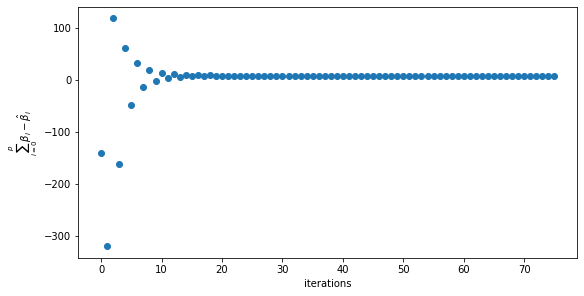

In [4]:
beta_diff = np.zeros(shape=(mse.shape[0], ))
for i in range(mse.shape[0]):
    beta_diff[i] = np.sum(beta_hat[i] - beta)

iterations = np.arange(beta_diff.shape[0])

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
_ = ax.scatter(iterations, beta_diff)
_ = ax.set_xlabel('iterations')
_ = ax.set_ylabel(r'$\sum_{i=0}^p \beta_i - \hat{\beta}_i$')